In [500]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [542]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [543]:
X = df.drop(columns = ['income'])
Y = df[['income']]

X = X.to_numpy()*0.01
Y = Y.to_numpy().ravel()*0.001

In [582]:
def initialize(X, Y):
      
    x_i, x_j = X.shape
    
    epoch = 1000
    learn_rate = 0.01
    
    b = 0
    w = np.random.randn(x_j)*0.1

    w, b, loss = gradient_descent(Y, w, X, b, epoch, learn_rate)
    
    return w, b, loss
    

In [583]:
def hypothesis(w, X, b):
    Y_pred = np.dot(X, w) + b
    
    return Y_pred

In [584]:
def loss_func(Y, w, X, b):
    
    Y_pred = hypothesis(w, X, b)
    j = np.mean((Y-Y_pred)**2)/2
    return j

In [585]:
def gradients(Y, w, X, b):
    
    Y_pred = hypothesis(w, X, b)
    # x_i, x_j = X.shape
    
    d_w = -np.dot(X.T, (Y - Y_pred)) / len(X)
    d_b = -np.mean(Y-Y_pred)
    
    return d_w, d_b

In [586]:
def gradient_descent(Y, w, X, b, epoch, learn_rate):
    loss = []
    
    for i in range(epoch):
        loss.append(loss_func(Y, w, X, b))
        d_w, d_b = gradients(Y, w, X, b)
        
        w -= learn_rate * d_w
        b -= learn_rate * d_b

    return w, b, loss

In [587]:
w, b, loss = initialize(X, Y)

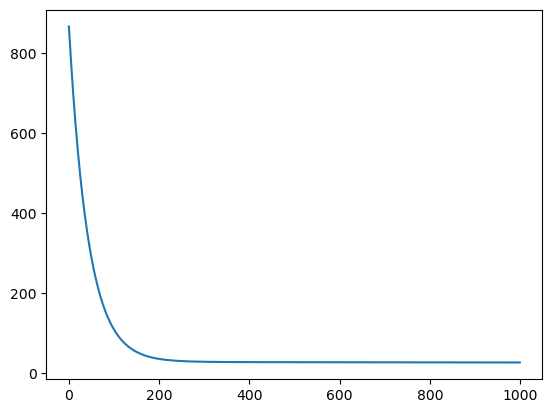

In [588]:
plt.plot(loss)